In [1]:
from pydicom import dcmread
from pydicom.data import get_testdata_files
import pandas as pd
import numpy as np
import torch
import os 

C:\Users\James\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#套件
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from pydicom import dcmread
import os
import cv2
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical 
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import concatenate
from keras import optimizers
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.applications import ResNet50
import gc
from tensorflow.keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras import callbacks
from keras import backend as K
from sklearn.model_selection import KFold
import glob
import pickle

from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation, Dropout, Average
from keras.models import Model
from keras.models import load_model
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy



In [3]:
df = pd.read_csv('train2.csv')

In [45]:
df.head(12)

,ID,Disease
0,1067739,1
1,1038067,0
2,422411,1
3,91553,1
4,1047213,1
5,1055483,0
6,665778,0
7,889464,0
8,976869,0
9,4194,0


In [5]:
train = df.sample(frac=0.7, replace=False,random_state= 10)

In [6]:
train

,ID,Disease
35,645706,1
132,3000485,1
47,1038449,0
24,5008735,1
90,666215,0
...,...,...
17,926877,0
118,3015828,1
148,279670,1
71,321605,0


In [7]:
train['Disease'].value_counts() # balanced

0    57
1    55
Name: Disease, dtype: int64

In [8]:
x = train['ID'].values

In [9]:
L = []
for i in range(len(x)):
    if len(str(x[i])) < 7:
        t = '0'* (7- len(str(x[i])))
        file = t + str(x[i])
    else:
        file = str(x[i])
    L.append(file)

In [10]:
L

['0645706',
 '3000485',
 '1038449',
 '5008735',
 '0666215',
 '0800754',
 '0444064',
 '1083015',
 '1080085',
 '0750240',
 '1075124',
 '0950833',
 '0310883',
 '1042265',
 '0868549',
 '0008098',
 '1109668',
 '1038067',
 '0517509',
 '0282810',
 '0621631',
 '0400347',
 '0998045',
 '1022864',
 '0173051',
 '0004355',
 '0246719',
 '0872270',
 '0333521',
 '0724695',
 '0409397',
 '0504066',
 '1057213',
 '0629049',
 '0035791',
 '0422411',
 '0197818',
 '0008253',
 '0800453',
 '0314683',
 '0636590',
 '0883397',
 '0624940',
 '0878908',
 '0624325',
 '0261538',
 '0551282',
 '0077069',
 '0598080',
 '0004309',
 '1153758',
 '0253537',
 '0373785',
 '0212297',
 '0222431',
 '0629056',
 '0065647',
 '1112575',
 '0735026',
 '5018481',
 '0784868',
 '0996511',
 '0436524',
 '0399215',
 '0098772',
 '0956503',
 '0220126',
 '1122340',
 '0091553',
 '0416567',
 '0545876',
 '1124340',
 '0007367',
 '0686373',
 '1060803',
 '1033842',
 '0100201',
 '1003178',
 '0164529',
 '0086060',
 '1068119',
 '1041597',
 '1104655',
 '08

In [11]:
train['ID'] = L
train

,ID,Disease
35,0645706,1
132,3000485,1
47,1038449,0
24,5008735,1
90,0666215,0
...,...,...
17,0926877,0
118,3015828,1
148,0279670,1
71,0321605,0


In [12]:
T1 = [] 
for i in train['ID']:
    path = 'C:\\Users\\renee\\DICOM2\\'+ i +'\\T1'
    os.chdir(path) #到指定資料夾
    x = os.listdir()
    data = [0]*len(x)
    for j in x:
        ds = dcmread(j)
        WC = ds.WindowCenter
        WW = ds.WindowWidth
        H = (int(ds.WindowCenter)*2 + int(ds.WindowWidth)) / 2
        L = H - int(ds.WindowWidth)
        arr = np.array(ds.pixel_array)
        arr[arr > H] = H
        arr[arr < L] = L
        arr = 255*((arr-L)/int(WW)) 
        data[int(ds.InstanceNumber)-1] = arr
    data = np.array(data)
    x_np = torch.from_numpy(data)
    x_np = x_np[None, None, :]
    x_np = torch.nn.functional.interpolate(x_np, size= [22,512,512], scale_factor=None, mode='trilinear')
    x_np = torch.reshape(x_np, (22,512,512))
    x_np = x_np.numpy()
    T1.append(x_np)

In [13]:
T1 = np.array(T1)
T1.shape

(112, 22, 512, 512)

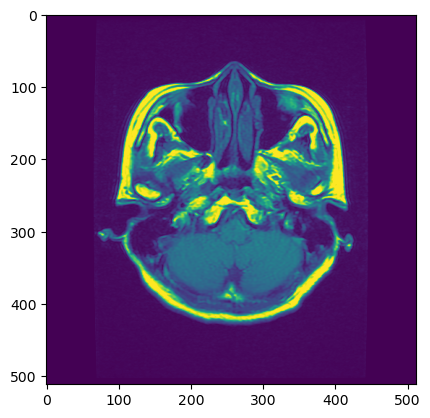

In [14]:
import matplotlib.pyplot as plt

# 以 matplotlib 繪製影像
plt.imshow(T1[0][2]) # 第一個病人 d = 3 之 slice
plt.show()

In [15]:
#T2

In [16]:
T2 = [] 
for i in train['ID']:
    path = 'C:\\Users\\renee\\DICOM2\\'+ i +'\\T2'
    os.chdir(path) #到指定資料夾
    y = os.listdir()
    data = [0]*len(y)
    for j in y:
        ds = dcmread(j)
        WC = ds.WindowCenter
        WW = ds.WindowWidth
        H = (int(ds.WindowCenter)*2 + int(ds.WindowWidth)) / 2
        L = H - int(ds.WindowWidth)
        arr = np.array(ds.pixel_array)
        arr[arr > H] = H
        arr[arr < L] = L
        arr = 255*((arr-L)/int(WW)) 
        data[int(ds.InstanceNumber)-1] = arr
    data = np.array(data)
    y_np = torch.from_numpy(data)
    y_np = y_np[None, None, :]
    y_np = torch.nn.functional.interpolate(y_np, size= [22,512,512], scale_factor=None, mode='trilinear')
    y_np = torch.reshape(y_np, (22,512,512))
    y_np = y_np.numpy()
    T2.append(y_np)

In [17]:
T2 = np.array(T2)
T2.shape

(112, 22, 512, 512)

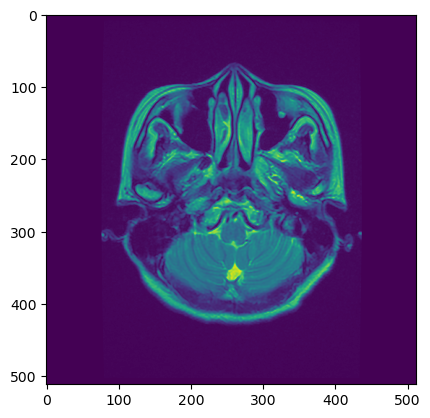

In [18]:
plt.imshow(T2[0][2])
plt.show()

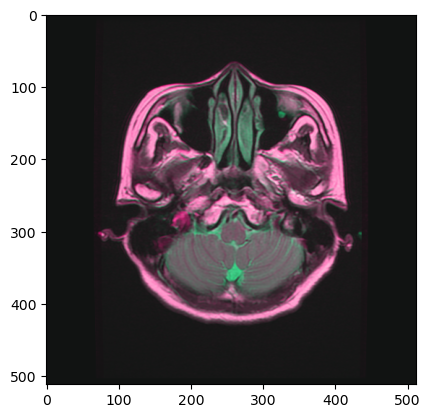

In [22]:
x = T1[0]
y = T2[0]
z = (T1[0]+T2[0])/2
image = np.expand_dims(x,axis=3)
i2 = np.expand_dims(y,axis=3)
i3 = np.expand_dims(z,axis=3)
image = np.concatenate((image,i2,i3),axis=-1)
image = image / 255

plt.imshow(image[2])
plt.show()

In [23]:
X_train = []
for i in range(len(T1)):
    x = T1[i]
    y = T2[i]
    z = (T1[i]+T2[i])/2
    i1 = np.expand_dims(x,axis=3)
    i2 = np.expand_dims(y,axis=3)
    i3 = np.expand_dims(z,axis=3)
    image = np.concatenate((i1,i2,i3),axis=-1)
    image = image / 255
    X_train.append(image)

In [24]:
X_train = np.array(X_train)

In [25]:
X_train.shape  #(N,D,H,W,Channel)

(112, 22, 512, 512, 3)

In [26]:
index = train.index

In [27]:
index[0]

35

In [29]:
from PIL import Image
for i in range(112):
    Index = index[i]
    ID = train.at[Index, 'ID']
    Disease = train.at[Index, 'Disease']
    for j in range(22):
        y = X_train[i][j]
        y = np.array(y)
        y = y*255
        img = Image.fromarray(y.astype(np.uint8))
        if Disease == 0:
            img.save('C:\\Users\\renee\hwk02\\train\\0\\'+str(ID)+'_'+str(j)+'.jpg')
        else:
            img.save('C:\\Users\\renee\\hwk02\\train\\1\\'+str(ID)+'_'+str(j)+'.jpg')

In [31]:
len(index)

112

In [32]:
index0 = df.index

In [36]:
#validation set
val_index = []
for i in range(160):
    if i not in index:
        val_index.append(i)

In [42]:
val_index

[0,
 8,
 9,
 11,
 13,
 15,
 16,
 18,
 22,
 23,
 27,
 28,
 30,
 31,
 33,
 36,
 40,
 54,
 57,
 62,
 64,
 65,
 73,
 74,
 77,
 86,
 88,
 89,
 92,
 93,
 94,
 100,
 107,
 113,
 115,
 122,
 123,
 124,
 125,
 126,
 136,
 139,
 143,
 144,
 146,
 155,
 157,
 159]

In [40]:
vali_ID = []
vali_disease = []

for i in range(48):
    top = val_index[i]
    ID = df.at[top, 'ID']
    Disease = df.at[top, 'Disease']
    vali_ID.append(ID)
    vali_disease.append(Disease)

In [41]:
# dictionary of lists 
dict = {'ID': vali_ID, 'Disease': vali_disease}     
valid = pd.DataFrame(dict)    
valid.head()

,ID,Disease
0,1067739,1
1,976869,0
2,4194,0
3,261016,1
4,1008632,0
5,910626,0
6,4725,0
7,145799,1
8,455658,0
9,862127,1


In [46]:
x2 = valid['ID'].values

In [47]:
L2 = []
for i in range(len(x2)):
    if len(str(x2[i])) < 7:
        t = '0'* (7- len(str(x2[i])))
        file2 = t + str(x2[i])
    else:
        file2 = str(x2[i])
    L2.append(file2)

In [49]:
valid['ID'] = L2
valid

,ID,Disease
0,1067739,1
1,0976869,0
2,0004194,0
3,0261016,1
4,1008632,0
5,0910626,0
6,0004725,0
7,0145799,1
8,0455658,0
9,0862127,1


In [50]:
T1_valid = [] 
for i in valid['ID']:
    path = 'C:\\Users\\renee\\DICOM2\\'+ i +'\\T1'
    os.chdir(path) #到指定資料夾
    x = os.listdir()
    data = [0]*len(x)
    for j in x:
        ds = dcmread(j)
        WC = ds.WindowCenter
        WW = ds.WindowWidth
        H = (int(ds.WindowCenter)*2 + int(ds.WindowWidth)) / 2
        L = H - int(ds.WindowWidth)
        arr = np.array(ds.pixel_array)
        arr[arr > H] = H
        arr[arr < L] = L
        arr = 255*((arr-L)/int(WW)) 
        data[int(ds.InstanceNumber)-1] = arr
    data = np.array(data)
    x_np = torch.from_numpy(data)
    x_np = x_np[None, None, :]
    x_np = torch.nn.functional.interpolate(x_np, size= [22,512,512], scale_factor=None, mode='trilinear')
    x_np = torch.reshape(x_np, (22,512,512))
    x_np = x_np.numpy()
    T1_valid.append(x_np)

In [51]:
T2_valid = [] 
for i in valid['ID']:
    path = 'C:\\Users\\renee\\DICOM2\\'+ i +'\\T2'
    os.chdir(path) #到指定資料夾
    x = os.listdir()
    data = [0]*len(x)
    for j in x:
        ds = dcmread(j)
        WC = ds.WindowCenter
        WW = ds.WindowWidth
        H = (int(ds.WindowCenter)*2 + int(ds.WindowWidth)) / 2
        L = H - int(ds.WindowWidth)
        arr = np.array(ds.pixel_array)
        arr[arr > H] = H
        arr[arr < L] = L
        arr = 255*((arr-L)/int(WW)) 
        data[int(ds.InstanceNumber)-1] = arr
    data = np.array(data)
    x_np = torch.from_numpy(data)
    x_np = x_np[None, None, :]
    x_np = torch.nn.functional.interpolate(x_np, size= [22,512,512], scale_factor=None, mode='trilinear')
    x_np = torch.reshape(x_np, (22,512,512))
    x_np = x_np.numpy()
    T2_valid.append(x_np)

In [52]:
T1_valid = np.array(T1_valid)
T2_valid = np.array(T2_valid)


In [53]:
T1_valid.shape

(48, 22, 512, 512)

In [54]:
X_valid = []
for i in range(len(T1_valid)):
    x = T1_valid[i]
    y = T2_valid[i]
    z = (T1_valid[i]+T2_valid[i])/2
    i1 = np.expand_dims(x,axis=3)
    i2 = np.expand_dims(y,axis=3)
    i3 = np.expand_dims(z,axis=3)
    image = np.concatenate((i1,i2,i3),axis=-1)
    image = image / 255
    X_valid.append(image)

X_valid = np.array(X_valid)

In [55]:
X_valid.shape  #(N,D,H,W,Channel)

(48, 22, 512, 512, 3)

In [58]:
val_index = valid.index

1

In [62]:
from PIL import Image
for i in range(48):
    ID = valid.at[i, 'ID']
    Disease = valid.at[i, 'Disease']
    for j in range(22):
        y = X_valid[i][j]
        y = np.array(y)
        y = y*255
        img = Image.fromarray(y.astype(np.uint8))
        if Disease == 0:
            img.save('C:\\Users\\renee\\data\\valid\\0\\'+str(ID)+'_'+str(j)+'.jpg')
        else:
            img.save('C:\\Users\\renee\\data\\valid\\1\\'+str(ID)+'_'+str(j)+'.jpg')